# Descriptive Analysis of the data

In [1]:
# load setup.py file
%run setup.py
pd.set_option('display.max_rows', 10)
# pd.options.plotting.backend = "plotly"

df_invited = pd.read_csv('factInvited.csv')
df_proceedings = pd.read_csv('factProceedings.csv')
df = df_invited.append(df_proceedings, ignore_index=True)

In [5]:
pd.set_option('display.max_rows', None)

In [60]:
print("Number of rows in factInvited.csv: ", df_invited.shape[0])
print("Number of unique invited speakers: ", df_invited['Full name'].nunique())

Number of rows in factInvited.csv:  1216
Number of unique invited speakers:  1032


### Bar Chart Count of Speakers per Conference/Field

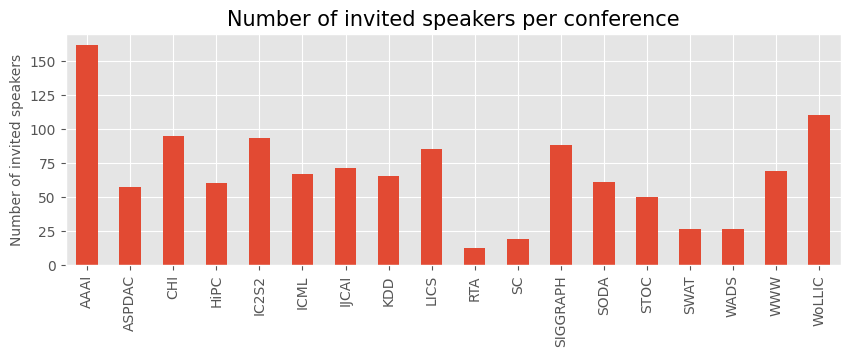

In [35]:
df_invited['Conference (short)'].value_counts().sort_index().plot(kind='bar',figsize=(10,3))
plt.ylabel('Number of invited speakers', fontsize=10)
plt.title('Number of invited speakers per conference', fontsize=15)
plt.show()

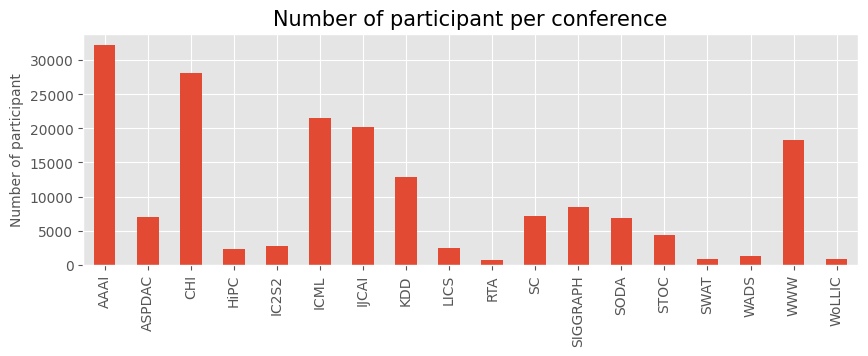

In [48]:
df_proceedings['Conference (short)'].value_counts().sort_index().plot(kind='bar',figsize=(10,3))
plt.ylabel('Number of participant', fontsize=10)
plt.title('Number of participant per conference', fontsize=15)
plt.show()

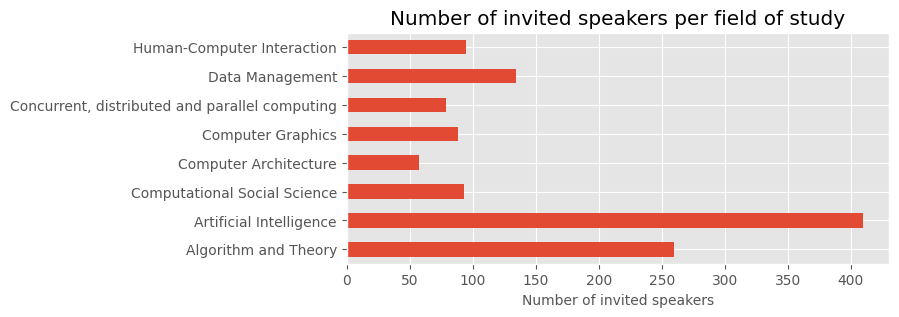

In [52]:
df_invited['Main Topic'].value_counts().sort_index().plot(kind='barh',figsize=(7,3))
plt.xlabel('Number of invited speakers', fontsize=10)
plt.title('Number of invited speakers per field of study')
plt.show()

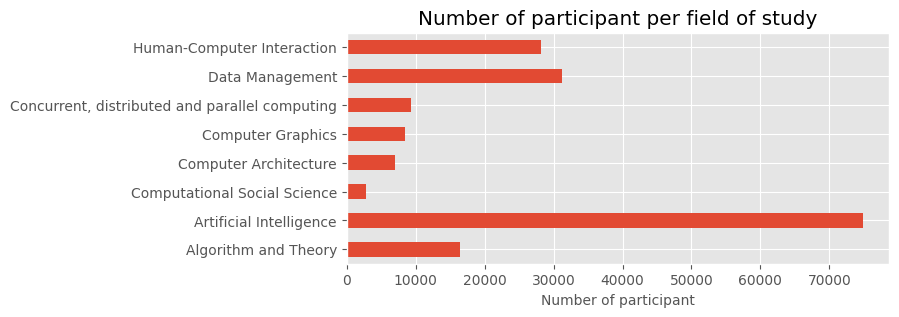

In [50]:
df_proceedings['Main Topic'].value_counts().sort_index().plot(kind='barh',figsize=(7,3))
plt.xlabel('Number of participant', fontsize=10)
plt.title('Number of participant per field of study')
plt.show()

### Distribution of Gender per Conference/Field

Text(0.5, 1.0, 'Ratio of gender per conference')

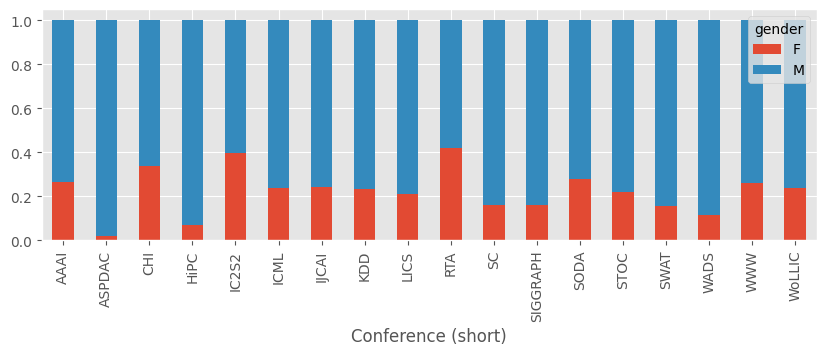

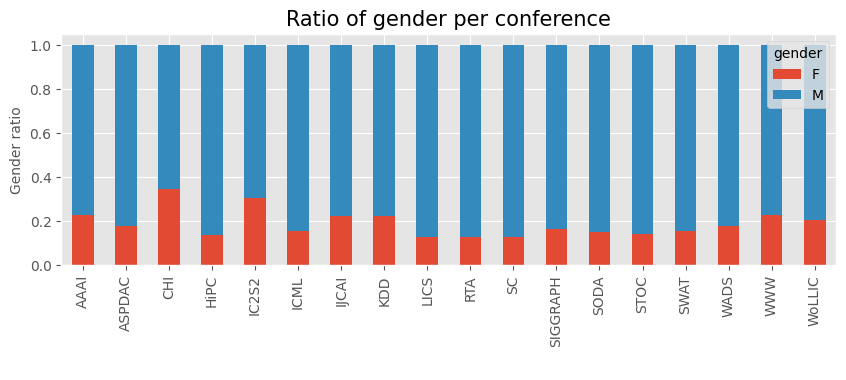

In [5]:
df_invited.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10,3))
df_proceedings.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10,3))
plt.xlabel(" ")
plt.ylabel("Gender ratio", fontsize=10)
plt.title("Ratio of gender per conference", fontsize=15)

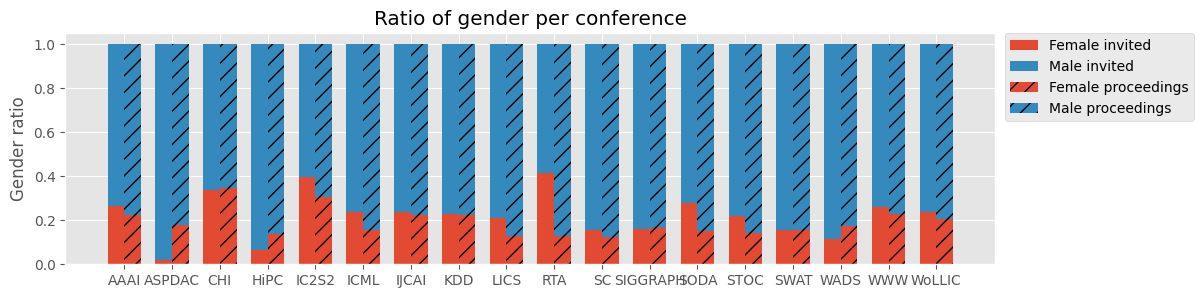

In [81]:
# Combine the two dataframes by conference name
df_combined = pd.merge(
    df_invited.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack(),
    df_proceedings.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack(),
    on='Conference (short)',
    suffixes=['_invited', '_proceedings']
)

# Create a grouped bar chart with two bars for each conference
labels = df_combined.index
female_invited_values = df_combined['F_invited']
male_invited_values = df_combined['M_invited']
female_proceedings_values = df_combined['F_proceedings']
male_proceedings_values = df_combined['M_proceedings']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,3))
rects1 = ax.bar(x - width/2, female_invited_values, width, label='Female invited')
rects2 = ax.bar(x - width/2, male_invited_values, width, label='Male invited', bottom=female_invited_values)
rects3 = ax.bar(x + width/2, female_proceedings_values, width, label='Female proceedings',hatch="//",color=rects1[0].get_facecolor())
rects4 = ax.bar(x + width/2, male_proceedings_values, width, label='Male proceedings', bottom=female_proceedings_values,hatch="//",color = rects2[0].get_facecolor())

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('')
ax.set_ylabel('Gender ratio')
ax.set_title('Ratio of gender per conference')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

plt.show()

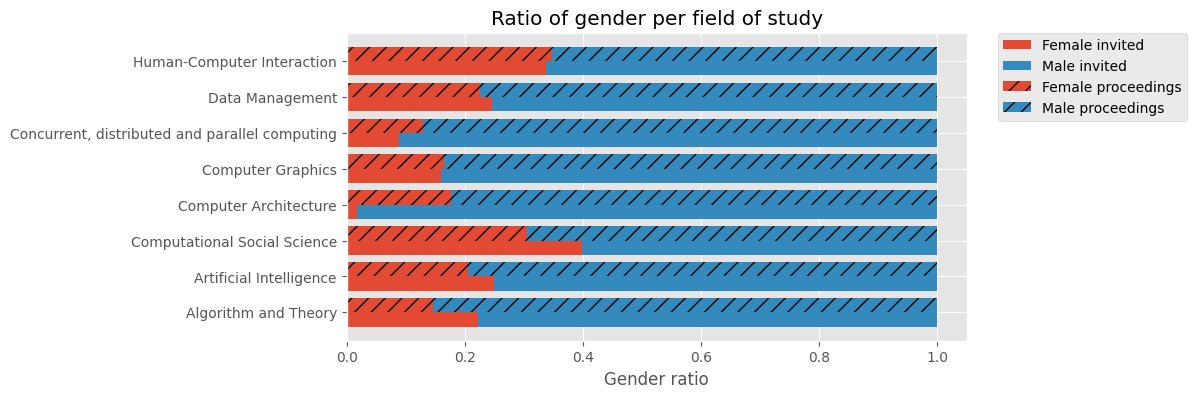

In [99]:
# Combine the two dataframes by conference name
df_combined = pd.merge(
    df_invited.groupby('Main Topic')['gender'].value_counts(normalize=True).unstack(),
    df_proceedings.groupby('Main Topic')['gender'].value_counts(normalize=True).unstack(),
    on='Main Topic',
    suffixes=['_invited', '_proceedings']
)

# Create a grouped bar chart with two bars for each conference
labels = df_combined.index
female_invited_values = df_combined['F_invited']
male_invited_values = df_combined['M_invited']
female_proceedings_values = df_combined['F_proceedings']
male_proceedings_values = df_combined['M_proceedings']

fig, ax = plt.subplots(figsize=(8, 4))
width = 0.4
y = np.arange(len(labels))

rects1 = ax.barh(y, female_invited_values, height=width, label='Female invited')
rects2 = ax.barh(y, male_invited_values, height=width, left=female_invited_values, label='Male invited')
rects3 = ax.barh(y + width, female_proceedings_values, height=width, label='Female proceedings', color=rects1[0].get_facecolor(),hatch = "//")
rects4 = ax.barh(y + width, male_proceedings_values, height=width, left=female_proceedings_values, label='Male proceedings', hatch = "//", color = rects2[0].get_facecolor())

# Legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Axes labels and title
plt.ylabel("")
plt.xlabel("Gender ratio")
plt.title("Ratio of gender per field of study")
ax.set_yticks(y + width/2)
ax.set_yticklabels(df_combined.index)

# Invert y-axis to show conference names from top to bottom
# plt.gca().invert_yaxis()

plt.show()

### Evolution of Gender Representation

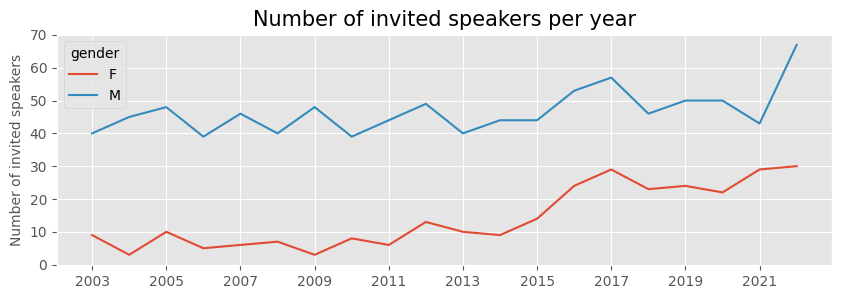

In [111]:
df_invited.groupby(['Year','gender']).size().unstack().plot(kind='line',figsize=(10,3))
plt.title('Number of invited speakers per year', fontsize=15)
plt.ylabel('Number of invited speakers', fontsize=10)
plt.xlabel("")
plt.xticks(np.arange(2003, 2023, 2))
plt.show()